Aim of this project is :-  Perdict the delivery time based on the accept time and location.
                            How much time typically take to deliver the product?
                            Finding the effiecncy of the courier deliver.
                            In which of the regions the delivery become more delay.

Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor
from datetime import datetime as dt

In [3]:
df = pd.read_csv("C:\\Users\\ranje\\ML assignmnets\\delivery_jl.csv")

In [5]:
df

,order_id,region_id,city,courier_id,lng,lat,aoi_id,aoi_type,accept_time,accept_gps_time,accept_gps_lng,accept_gps_lat,delivery_time,delivery_gps_time,delivery_gps_lng,delivery_gps_lat,ds
0,3322376,31,Jilin,4849,126.56526,43.84112,94,14,09-25 08:08:00,09-25 08:08:00,126.56614,43.87092,09-25 11:32:00,09-25 11:32:00,126.56919,43.84248,925
1,4093119,31,Jilin,4849,126.56519,43.84110,94,14,08-21 09:11:00,08-21 09:11:00,126.56611,43.87081,08-21 15:00:00,08-21 15:00:00,126.56939,43.84269,821
2,36226,31,Jilin,4849,126.56987,43.85017,235,14,06-08 15:42:00,06-08 15:42:00,126.56612,43.87074,06-08 17:24:00,06-08 17:24:00,126.57628,43.84771,608
3,3950697,31,Jilin,4849,126.56984,43.85005,235,14,09-03 14:03:00,09-03 14:03:00,NaN,NaN,09-03 16:31:00,09-03 16:31:00,126.56815,43.85131,903
4,4455630,31,Jilin,4849,126.56991,43.85006,235,14,06-07 14:54:00,06-07 14:54:00,126.56597,43.87104,06-07 16:58:00,06-07 16:58:00,126.57030,43.84985,607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31410,3383266,165,Jilin,3156,126.55005,43.90468,60052,1,07-31 09:24:00,07-31 09:24:00,126.58485,43.89466,07-31 16:40:00,07-31 16:40:00,126.55038,43.90408,731
31411,1489549,165,Jilin,3156,126.55065,43.90457,60052,1,06-28 08:55:00,06-28 08:55:00,NaN,NaN,06-28 15:06:00,06-28 15:06:00,126.55025,43.90383,628
31412,3974744,165,Jilin,3156,126.54986,43.90503,60052,1,07-20 08:41:00,07-20 08:41:00,NaN,NaN,07-20 16:20:00,07-20 16:20:00,126.55047,43.90402,720
31413,2169583,165,Jilin,3156,126.55059,43.90421,60052,1,07-02 09:04:00,07-02 09:04:00,126.58472,43.89470,07-02 14:23:00,07-02 14:23:00,126.55043,43.90417,702


In [7]:
pd.set_option('display.max_columns', None)


In [9]:
df.head()

,order_id,region_id,city,courier_id,lng,lat,aoi_id,aoi_type,accept_time,accept_gps_time,accept_gps_lng,accept_gps_lat,delivery_time,delivery_gps_time,delivery_gps_lng,delivery_gps_lat,ds
0,3322376,31,Jilin,4849,126.56526,43.84112,94,14,09-25 08:08:00,09-25 08:08:00,126.56614,43.87092,09-25 11:32:00,09-25 11:32:00,126.56919,43.84248,925
1,4093119,31,Jilin,4849,126.56519,43.84110,94,14,08-21 09:11:00,08-21 09:11:00,126.56611,43.87081,08-21 15:00:00,08-21 15:00:00,126.56939,43.84269,821
2,36226,31,Jilin,4849,126.56987,43.85017,235,14,06-08 15:42:00,06-08 15:42:00,126.56612,43.87074,06-08 17:24:00,06-08 17:24:00,126.57628,43.84771,608
3,3950697,31,Jilin,4849,126.56984,43.85005,235,14,09-03 14:03:00,09-03 14:03:00,NaN,NaN,09-03 16:31:00,09-03 16:31:00,126.56815,43.85131,903
4,4455630,31,Jilin,4849,126.56991,43.85006,235,14,06-07 14:54:00,06-07 14:54:00,126.56597,43.87104,06-07 16:58:00,06-07 16:58:00,126.57030,43.84985,607


In [11]:
df.tail()

,order_id,region_id,city,courier_id,lng,lat,aoi_id,aoi_type,accept_time,accept_gps_time,accept_gps_lng,accept_gps_lat,delivery_time,delivery_gps_time,delivery_gps_lng,delivery_gps_lat,ds
31410,3383266,165,Jilin,3156,126.55005,43.90468,60052,1,07-31 09:24:00,07-31 09:24:00,126.58485,43.89466,07-31 16:40:00,07-31 16:40:00,126.55038,43.90408,731
31411,1489549,165,Jilin,3156,126.55065,43.90457,60052,1,06-28 08:55:00,06-28 08:55:00,NaN,NaN,06-28 15:06:00,06-28 15:06:00,126.55025,43.90383,628
31412,3974744,165,Jilin,3156,126.54986,43.90503,60052,1,07-20 08:41:00,07-20 08:41:00,NaN,NaN,07-20 16:20:00,07-20 16:20:00,126.55047,43.90402,720
31413,2169583,165,Jilin,3156,126.55059,43.90421,60052,1,07-02 09:04:00,07-02 09:04:00,126.58472,43.89470,07-02 14:23:00,07-02 14:23:00,126.55043,43.90417,702
31414,4259532,165,Jilin,3156,126.55060,43.90448,60052,1,08-01 09:06:00,08-01 09:06:00,126.58478,43.89466,08-01 21:08:00,08-01 21:08:00,126.55056,43.90441,801


# Preprocessing

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31415 entries, 0 to 31414
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   order_id           31415 non-null  int64  
 1   region_id          31415 non-null  int64  
 2   city               31415 non-null  object 
 3   courier_id         31415 non-null  int64  
 4   lng                31415 non-null  float64
 5   lat                31415 non-null  float64
 6   aoi_id             31415 non-null  int64  
 7   aoi_type           31415 non-null  int64  
 8   accept_time        31415 non-null  object 
 9   accept_gps_time    31415 non-null  object 
 10  accept_gps_lng     30460 non-null  float64
 11  accept_gps_lat     30460 non-null  float64
 12  delivery_time      31415 non-null  object 
 13  delivery_gps_time  31415 non-null  object 
 14  delivery_gps_lng   31415 non-null  float64
 15  delivery_gps_lat   31415 non-null  float64
 16  ds                 314

In [15]:
df.isnull().sum()

order_id               0
region_id              0
city                   0
courier_id             0
lng                    0
lat                    0
aoi_id                 0
aoi_type               0
accept_time            0
accept_gps_time        0
accept_gps_lng       955
accept_gps_lat       955
delivery_time          0
delivery_gps_time      0
delivery_gps_lng       0
delivery_gps_lat       0
ds                     0
dtype: int64

In [17]:
df.city.nunique()

1

In [19]:
df.drop(columns=['city','accept_gps_time','delivery_gps_time','ds'],inplace = True)

In [21]:
df.tail()

,order_id,region_id,courier_id,lng,lat,aoi_id,aoi_type,accept_time,accept_gps_lng,accept_gps_lat,delivery_time,delivery_gps_lng,delivery_gps_lat
31410,3383266,165,3156,126.55005,43.90468,60052,1,07-31 09:24:00,126.58485,43.89466,07-31 16:40:00,126.55038,43.90408
31411,1489549,165,3156,126.55065,43.90457,60052,1,06-28 08:55:00,NaN,NaN,06-28 15:06:00,126.55025,43.90383
31412,3974744,165,3156,126.54986,43.90503,60052,1,07-20 08:41:00,NaN,NaN,07-20 16:20:00,126.55047,43.90402
31413,2169583,165,3156,126.55059,43.90421,60052,1,07-02 09:04:00,126.58472,43.89470,07-02 14:23:00,126.55043,43.90417
31414,4259532,165,3156,126.55060,43.90448,60052,1,08-01 09:06:00,126.58478,43.89466,08-01 21:08:00,126.55056,43.90441


In [23]:
# Filling the missing value with medain
df['accept_gps_lng']=df['accept_gps_lng'].fillna(df['accept_gps_lng'].median())
df['accept_gps_lat']=df['accept_gps_lat'].fillna(df['accept_gps_lat'].median())

In [25]:
df.iloc[120:130]

,order_id,region_id,courier_id,lng,lat,aoi_id,aoi_type,accept_time,accept_gps_lng,accept_gps_lat,delivery_time,delivery_gps_lng,delivery_gps_lat
120,3398118,31,949,126.58877,43.83751,1101,10,06-15 07:45:00,126.56618,43.87128,06-15 09:56:00,126.58999,43.83787
121,1942128,31,4849,126.57350,43.83814,1118,0,09-27 08:13:00,126.56635,43.87104,09-27 11:29:00,126.57375,43.83775
122,4506548,31,4849,126.57344,43.83811,1118,0,10-01 07:36:00,126.56624,43.87077,10-01 11:22:00,126.57318,43.83808
123,4292027,31,4849,126.57369,43.83854,1118,0,05-25 14:02:00,126.56621,43.87118,05-25 17:00:00,126.57406,43.83861
124,4331080,31,4849,126.57356,43.83804,1118,0,09-28 08:31:00,126.56637,43.87107,09-28 12:07:00,126.57375,43.83784
125,2816710,31,435,126.56057,43.85828,1530,14,08-22 07:51:00,126.56600,43.87071,08-22 11:37:00,126.56387,43.86353
126,4000673,31,435,126.56067,43.85821,1530,14,09-28 08:30:00,126.56612,43.87074,09-28 15:39:00,126.56615,43.87100
127,1074543,31,435,126.56225,43.85851,1530,14,05-18 08:39:00,126.56594,43.87072,05-18 16:21:00,126.56465,43.86485
128,4149099,31,435,126.56104,43.85845,1530,14,10-01 07:48:00,126.56613,43.87064,10-01 11:47:00,126.56011,43.85840
129,1891398,31,435,126.56098,43.85847,1530,14,06-28 08:48:00,126.56602,43.87070,06-28 10:20:00,126.56148,43.85852


In [27]:
df.describe()

,order_id,region_id,courier_id,lng,lat,aoi_id,aoi_type,accept_gps_lng,accept_gps_lat,delivery_gps_lng,delivery_gps_lat
count,3.141500e+04,31415.000000,31415.000000,31415.000000,31415.000000,31415.000000,31415.000000,31415.000000,31415.000000,31415.000000,31415.000000
mean,2.263628e+06,80.518065,1967.872991,126.557335,43.842109,30774.598122,4.847812,126.525711,43.834793,126.552945,43.840604
std,1.304003e+06,48.976862,1548.948294,0.023976,0.033334,18500.432250,5.783788,2.141942,0.742581,0.714464,0.249594
min,1.240000e+02,31.000000,75.000000,126.419560,43.684600,66.000000,0.000000,-0.000090,-0.000090,0.000040,0.000030
25%,1.141215e+06,31.000000,638.000000,126.545480,43.819760,13549.000000,1.000000,126.544590,43.812180,126.544860,43.820060
50%,2.262834e+06,53.000000,1558.000000,126.558610,43.836790,30242.000000,1.000000,126.566150,43.850240,126.558550,43.837480
75%,3.400210e+06,129.000000,2925.000000,126.572685,43.853590,48297.500000,14.000000,126.566900,43.870890,126.572590,43.854360
max,4.514300e+06,165.000000,4849.000000,126.819050,44.223350,60103.000000,14.000000,126.628850,43.945210,126.676340,43.997680


In [29]:
df["accept_time"] = pd.to_datetime("2024-" + df["accept_time"], format="%Y-%m-%d %H:%M:%S")
df["delivery_time"] = pd.to_datetime("2024-" + df["delivery_time"], format="%Y-%m-%d %H:%M:%S")

In [31]:
df['delivery_min']=(df['delivery_time']-df['accept_time']).dt.total_seconds()/60

In [33]:
df.delivery_min

0        204.0
1        349.0
2        102.0
3        148.0
4        124.0
         ...  
31410    436.0
31411    371.0
31412    459.0
31413    319.0
31414    722.0
Name: delivery_min, Length: 31415, dtype: float64

In [35]:
df.columns

Index(['order_id', 'region_id', 'courier_id', 'lng', 'lat', 'aoi_id',
       'aoi_type', 'accept_time', 'accept_gps_lng', 'accept_gps_lat',
       'delivery_time', 'delivery_gps_lng', 'delivery_gps_lat',
       'delivery_min'],
      dtype='object')

In [37]:
# check the duplicates
duplicate_count = df.duplicated().sum()
duplicate_count


0

In [41]:
# analysing the outliers in delivery in minitues(target column).
skw_value = df['delivery_min'].skew()
skw_value


1.9963297239387228

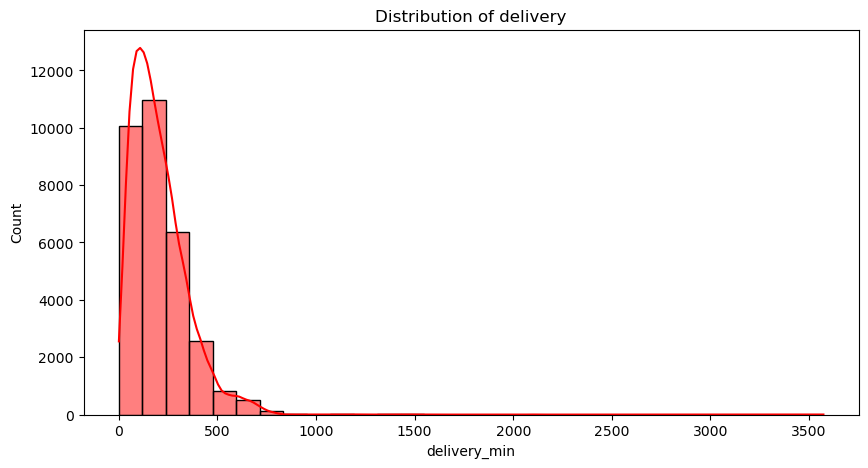

In [43]:
# visualisation of skneweness through histoplot
plt.figure(figsize=(10,5))
sns.histplot(df['delivery_min'],color ='red',kde=True,bins =30)
plt.title('Distribution of delivery')
plt.show()

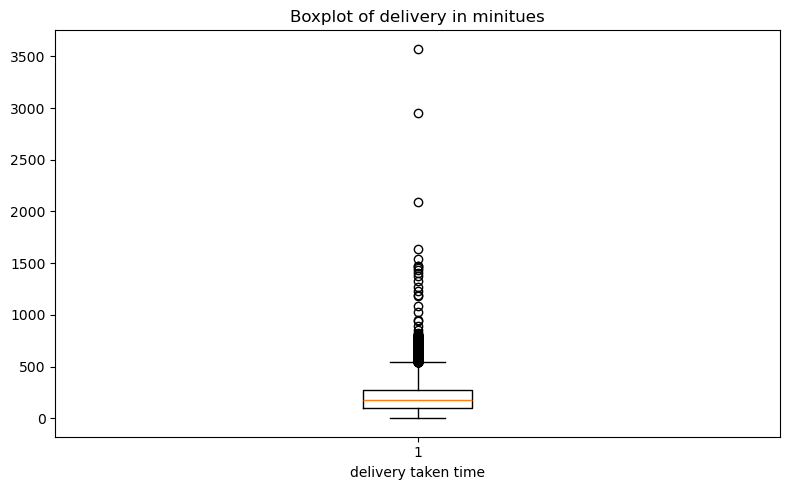

In [45]:
# make boxplot for finding the outliers
plt.figure(figsize =(8,5))
plt.boxplot(df['delivery_min'])
plt.title("Boxplot of delivery in minitues")
plt.xlabel('delivery taken time')
plt.tight_layout()
plt.show()

In [47]:
# In this visualization we understand its an positive sknewness. so, we can treat the outliers using IQR.
Q1 = df['delivery_min'].quantile(0.25)
Q3 = df['delivery_min'].quantile(0.75)

IQR = Q3-Q1

lower_bound = Q1-1.5*IQR
upper_bound = Q3 +1.5*IQR

new_df= df[(df['delivery_min']>= lower_bound)&(df['delivery_min']<=upper_bound)]

print('Before removal outliers',df.shape)
print('After removal outliers',new_df.shape)




Before removal outliers (31415, 14)
After removal outliers (30485, 14)


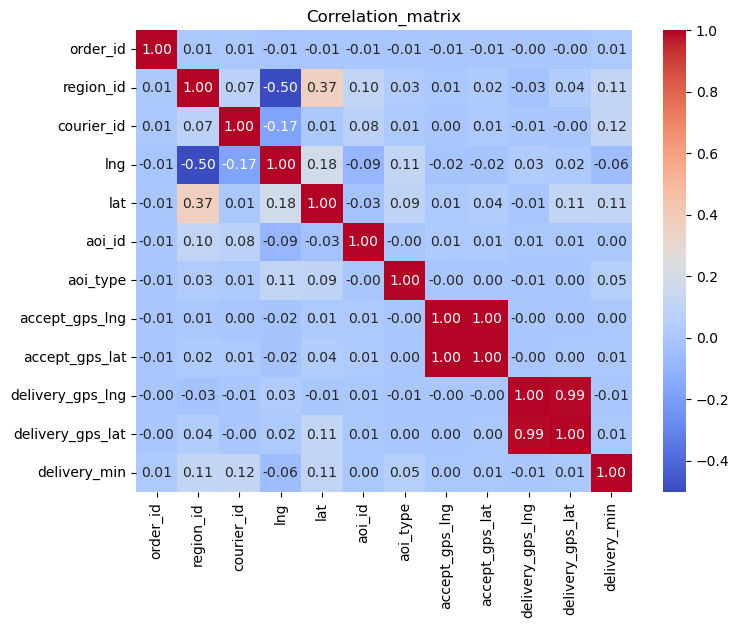

In [49]:
# Correlation 
corr_df = df.select_dtypes(include='number')
corr = corr_df.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr,annot = True,cmap = 'coolwarm',fmt='.2f')
plt.title('Correlation_matrix')
plt.show()

In [51]:
# Feature Engineering
new_df['accept_month']= new_df['accept_time'].dt.month
new_df['accept_day'] = new_df['accept_time'].dt.day
new_df['accept_hour'] = new_df['accept_time'].dt.hour
new_df['delivery_month']= new_df['delivery_time'].dt.month
new_df['delivery_day'] = new_df['delivery_time'].dt.day
new_df['delivery_hour'] = new_df['delivery_time'].dt.hour

C:\Users\ranje\AppData\Local\Temp\ipykernel_17300\24903769.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['accept_month']= new_df['accept_time'].dt.month
C:\Users\ranje\AppData\Local\Temp\ipykernel_17300\24903769.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['accept_day'] = new_df['accept_time'].dt.day
C:\Users\ranje\AppData\Local\Temp\ipykernel_17300\24903769.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

In [55]:
new_df.drop(columns=['accept_time','delivery_time'],inplace = True)

C:\Users\ranje\AppData\Local\Temp\ipykernel_17300\3804810609.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.drop(columns=['accept_time','delivery_time'],inplace = True)


In [57]:
new_df.head()

,order_id,region_id,courier_id,lng,lat,aoi_id,aoi_type,accept_gps_lng,accept_gps_lat,delivery_gps_lng,delivery_gps_lat,delivery_min,accept_month,accept_day,accept_hour,delivery_month,delivery_day,delivery_hour
0,3322376,31,4849,126.56526,43.84112,94,14,126.56614,43.87092,126.56919,43.84248,204.0,9,25,8,9,25,11
1,4093119,31,4849,126.56519,43.84110,94,14,126.56611,43.87081,126.56939,43.84269,349.0,8,21,9,8,21,15
2,36226,31,4849,126.56987,43.85017,235,14,126.56612,43.87074,126.57628,43.84771,102.0,6,8,15,6,8,17
3,3950697,31,4849,126.56984,43.85005,235,14,126.56615,43.85024,126.56815,43.85131,148.0,9,3,14,9,3,16
4,4455630,31,4849,126.56991,43.85006,235,14,126.56597,43.87104,126.57030,43.84985,124.0,6,7,14,6,7,16


In [59]:
# Dealy analysis using threshold value.
threshold_value =new_df['delivery_min'].quantile(0.90)
new_df['delay'] = new_df['delivery_min']>=threshold_value
new_df.head()


C:\Users\ranje\AppData\Local\Temp\ipykernel_17300\3455719517.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['delay'] = new_df['delivery_min']>=threshold_value


,order_id,region_id,courier_id,lng,lat,aoi_id,aoi_type,accept_gps_lng,accept_gps_lat,delivery_gps_lng,delivery_gps_lat,delivery_min,accept_month,accept_day,accept_hour,delivery_month,delivery_day,delivery_hour,delay
0,3322376,31,4849,126.56526,43.84112,94,14,126.56614,43.87092,126.56919,43.84248,204.0,9,25,8,9,25,11,False
1,4093119,31,4849,126.56519,43.84110,94,14,126.56611,43.87081,126.56939,43.84269,349.0,8,21,9,8,21,15,False
2,36226,31,4849,126.56987,43.85017,235,14,126.56612,43.87074,126.57628,43.84771,102.0,6,8,15,6,8,17,False
3,3950697,31,4849,126.56984,43.85005,235,14,126.56615,43.85024,126.56815,43.85131,148.0,9,3,14,9,3,16,False
4,4455630,31,4849,126.56991,43.85006,235,14,126.56597,43.87104,126.57030,43.84985,124.0,6,7,14,6,7,16,False


In [61]:
delay_by_region = new_df.groupby('region_id')['delay'].mean().sort_values(ascending = False).head(10)
delay_by_hour = new_df.groupby('accept_hour')['delay'].mean().sort_values(ascending = False)
print('Delay by region',delay_by_region)
print('Delay by Hour',delay_by_hour)

Delay by region region_id
165    0.210825
31     0.095636
129    0.084101
53     0.082479
Name: delay, dtype: float64
Delay by Hour accept_hour
6     0.500000
11    0.126263
8     0.123635
9     0.123528
10    0.109252
7     0.084787
12    0.056270
13    0.029586
14    0.016393
15    0.005247
18    0.000000
21    0.000000
20    0.000000
19    0.000000
1     0.000000
17    0.000000
16    0.000000
2     0.000000
22    0.000000
Name: delay, dtype: float64


C:\Users\ranje\AppData\Local\Temp\ipykernel_17300\2706588165.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=delay_by_region.index, y=delay_by_region.values, palette="viridis")


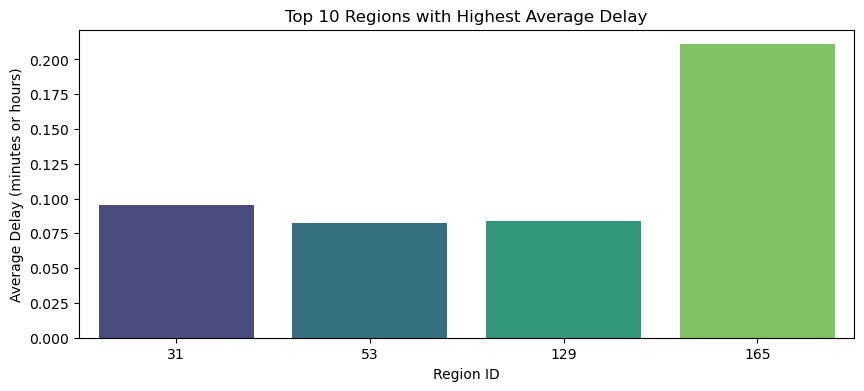

In [113]:
plt.figure(figsize=(10, 4))
sns.barplot(x=delay_by_region.index, y=delay_by_region.values, palette="viridis")
plt.title("Top 10 Regions with Highest Average Delay")
plt.xlabel("Region ID")
plt.ylabel("Average Delay (minutes or hours)")
plt.show()


Findings : From over all, took top 10 heighst average delay  in that plot chart visualise  the region id number 165 which takes more time around (0.200 minitues) to deliver the products. 

# Based on the courier id finding the top 10 heighest courier deliveries.

In [136]:
courier_speed = new_df.groupby('courier_id')['delivery_min'].mean().sort_values()
print('Top 10 Fastest Couriers')
courier_speed.head(10)

Top 10 Fastest Couriers


courier_id
2138      0.375000
4785     31.000000
4801     47.000000
2659     66.000000
4598     72.500000
3442     85.285714
4322    105.992308
1103    113.864800
3853    114.846154
2618    118.163636
Name: delivery_min, dtype: float64

C:\Users\ranje\AppData\Local\Temp\ipykernel_17300\4272575796.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=courier_speed.head(10).index, y=courier_speed.head(10).values, palette="Blues_r")


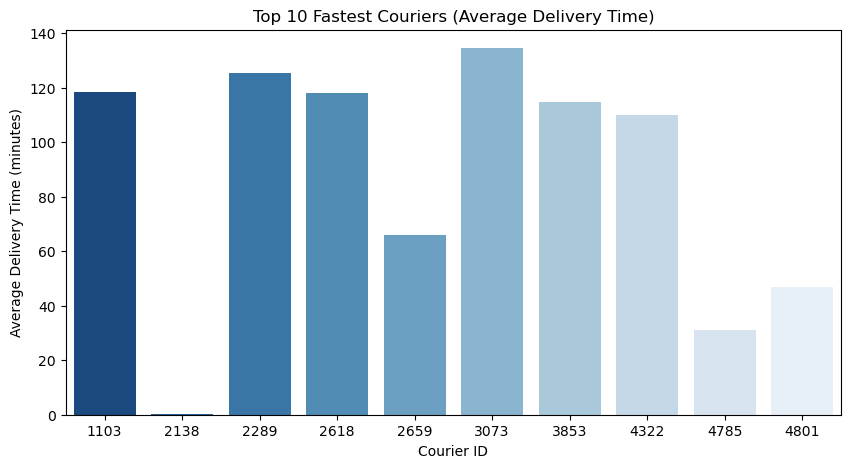

In [134]:
plt.figure(figsize=(10, 5))
sns.barplot(x=courier_speed.head(10).index, y=courier_speed.head(10).values, palette="Blues_r")
plt.title("Top 10 Fastest Couriers (Average Delivery Time)")
plt.xlabel("Courier ID")
plt.ylabel("Average Delivery Time (minutes)")
plt.show()

One-Hot Coading

In [65]:
categorical_cols = ["region_id", "courier_id", "aoi_id"]
df_encoded = pd.get_dummies(new_df, columns=categorical_cols, drop_first=True)
print(df_encoded)

       order_id        lng       lat  aoi_type  accept_gps_lng  \
0       3322376  126.56526  43.84112        14       126.56614   
1       4093119  126.56519  43.84110        14       126.56611   
2         36226  126.56987  43.85017        14       126.56612   
3       3950697  126.56984  43.85005        14       126.56615   
4       4455630  126.56991  43.85006        14       126.56597   
...         ...        ...       ...       ...             ...   
31409   2734151  126.55053  43.90412         1       126.58461   
31410   3383266  126.55005  43.90468         1       126.58485   
31411   1489549  126.55065  43.90457         1       126.56615   
31412   3974744  126.54986  43.90503         1       126.56615   
31413   2169583  126.55059  43.90421         1       126.58472   

       accept_gps_lat  delivery_gps_lng  delivery_gps_lat  delivery_min  \
0            43.87092         126.56919          43.84248         204.0   
1            43.87081         126.56939          43.84269

Here, the region_id , courier_id, aoi_id shown as numeric number but it still not a countinus numeric. it just for assuming as
a code. so that, i calculate one hot cording for get a real and countinus series.

In [68]:
df_encoded.head()

,order_id,lng,lat,aoi_type,accept_gps_lng,accept_gps_lat,delivery_gps_lng,delivery_gps_lat,delivery_min,accept_month,accept_day,accept_hour,delivery_month,delivery_day,delivery_hour,delay,region_id_53,region_id_129,region_id_165,courier_id_87,courier_id_152,courier_id_161,courier_id_218,courier_id_290,courier_id_318,courier_id_323,courier_id_435,courier_id_487,courier_id_588,courier_id_638,courier_id_854,courier_id_949,courier_id_967,courier_id_979,courier_id_1087,courier_id_1103,courier_id_1177,courier_id_1520,courier_id_1558,courier_id_1656,courier_id_1756,courier_id_1794,courier_id_2060,courier_id_2138,courier_id_2208,courier_id_2289,courier_id_2302,courier_id_2398,courier_id_2452,courier_id_2615,courier_id_2618,courier_id_2659,courier_id_2665,courier_id_2688,courier_id_2709,courier_id_2925,courier_id_2945,courier_id_3030,courier_id_3073,courier_id_3156,courier_id_3408,courier_id_3442,courier_id_3458,courier_id_3559,courier_id_3853,courier_id_3867,courier_id_3939,courier_id_4114,courier_id_4322,courier_id_4474,courier_id_4598,courier_id_4609,courier_id_4785,courier_id_4801,courier_id_4849,aoi_id_94,aoi_id_235,aoi_id_278,aoi_id_301,aoi_id_328,aoi_id_493,aoi_id_570,aoi_id_584,aoi_id_629,aoi_id_643,aoi_id_754,aoi_id_819,aoi_id_856,aoi_id_952,aoi_id_953,aoi_id_970,aoi_id_1101,aoi_id_1118,aoi_id_1157,aoi_id_1317,aoi_id_1346,aoi_id_1402,aoi_id_1422,aoi_id_1442,aoi_id_1481,aoi_id_1530,aoi_id_1642,aoi_id_1665,aoi_id_1696,aoi_id_1700,aoi_id_1713,aoi_id_1822,aoi_id_1838,aoi_id_1996,aoi_id_2098,aoi_id_2198,aoi_id_2236,aoi_id_2288,aoi_id_2430,aoi_id_2512,aoi_id_2543,aoi_id_2553,aoi_id_2569,aoi_id_2644,aoi_id_2699,aoi_id_2709,aoi_id_2781,aoi_id_2796,aoi_id_2807,aoi_id_2815,aoi_id_2829,aoi_id_2888,aoi_id_2919,aoi_id_2928,aoi_id_2960,aoi_id_2993,aoi_id_3044,aoi_id_3081,aoi_id_3104,aoi_id_3177,aoi_id_3184,aoi_id_3209,aoi_id_3302,aoi_id_3364,aoi_id_3471,aoi_id_3537,aoi_id_3598,aoi_id_3631,aoi_id_3765,aoi_id_3767,aoi_id_3772,aoi_id_3811,aoi_id_4003,aoi_id_4036,aoi_id_4077,aoi_id_4140,aoi_id_4176,aoi_id_4310,aoi_id_4638,aoi_id_4706,aoi_id_4832,aoi_id_4891,aoi_id_4932,aoi_id_4963,aoi_id_5147,aoi_id_5182,aoi_id_5204,aoi_id_5208,aoi_id_5286,aoi_id_5300,aoi_id_5314,aoi_id_5512,aoi_id_5528,aoi_id_5569,aoi_id_5573,aoi_id_5596,aoi_id_5647,aoi_id_5704,aoi_id_5740,aoi_id_5789,aoi_id_5916,aoi_id_5932,aoi_id_5933,aoi_id_5944,aoi_id_6002,aoi_id_6011,aoi_id_6018,aoi_id_6301,aoi_id_6347,aoi_id_6393,aoi_id_6408,aoi_id_6591,aoi_id_6599,aoi_id_6609,aoi_id_6620,aoi_id_6651,aoi_id_6671,aoi_id_6704,aoi_id_6793,aoi_id_6852,aoi_id_7041,aoi_id_7156,aoi_id_7189,aoi_id_7307,aoi_id_7388,aoi_id_7448,aoi_id_7474,aoi_id_7493,aoi_id_7753,aoi_id_7771,aoi_id_7779,aoi_id_7782,aoi_id_7973,aoi_id_8006,aoi_id_8013,aoi_id_8024,aoi_id_8039,aoi_id_8090,aoi_id_8103,aoi_id_8112,aoi_id_8129,aoi_id_8251,aoi_id_8306,aoi_id_8358,aoi_id_8384,aoi_id_8444,aoi_id_8454,aoi_id_8472,aoi_id_8542,aoi_id_8556,aoi_id_8786,aoi_id_8803,aoi_id_8931,aoi_id_8965,aoi_id_9028,aoi_id_9037,aoi_id_9070,aoi_id_9071,aoi_id_9104,aoi_id_9147,aoi_id_9185,aoi_id_9272,aoi_id_9398,aoi_id_9441,aoi_id_9469,aoi_id_9494,aoi_id_9502,aoi_id_9519,aoi_id_9565,aoi_id_9603,aoi_id_9734,aoi_id_9781,aoi_id_9785,aoi_id_9794,aoi_id_9811,aoi_id_9846,aoi_id_9898,aoi_id_9968,aoi_id_10049,aoi_id_10052,aoi_id_10069,aoi_id_10080,aoi_id_10097,aoi_id_10156,aoi_id_10283,aoi_id_10308,aoi_id_10400,aoi_id_10450,aoi_id_10631,aoi_id_10651,aoi_id_10669,aoi_id_10742,aoi_id_10752,aoi_id_10782,aoi_id_10790,aoi_id_10863,aoi_id_10939,aoi_id_11010,aoi_id_11030,aoi_id_11056,aoi_id_11110,aoi_id_11171,aoi_id_11400,aoi_id_11415,aoi_id_11440,aoi_id_11448,aoi_id_11490,aoi_id_11537,aoi_id_11596,aoi_id_11646,aoi_id_11647,aoi_id_11649,aoi_id_11711,aoi_id_11781,aoi_id_11840,aoi_id_11843,aoi_id_11870,aoi_id_11885,aoi_id_11942,aoi_id_11976,aoi_id_11986,aoi_id_11993,aoi_id_12215,aoi_id_12230,aoi_id_12242,aoi_id_12259,aoi_id_12322,aoi_id_12338,aoi_id_12538,aoi_id_12560,aoi_id_12613,aoi_id_12648,aoi_id_12690,aoi_id_12748,aoi_id_12761,aoi_id_12881,aoi_id_12920,aoi_i

In [70]:
# select Features and Target
X = df_encoded.drop('delivery_min',axis=1)
print(X)
y = df_encoded['delivery_min']
print('target value',y)

       order_id        lng       lat  aoi_type  accept_gps_lng  \
0       3322376  126.56526  43.84112        14       126.56614   
1       4093119  126.56519  43.84110        14       126.56611   
2         36226  126.56987  43.85017        14       126.56612   
3       3950697  126.56984  43.85005        14       126.56615   
4       4455630  126.56991  43.85006        14       126.56597   
...         ...        ...       ...       ...             ...   
31409   2734151  126.55053  43.90412         1       126.58461   
31410   3383266  126.55005  43.90468         1       126.58485   
31411   1489549  126.55065  43.90457         1       126.56615   
31412   3974744  126.54986  43.90503         1       126.56615   
31413   2169583  126.55059  43.90421         1       126.58472   

       accept_gps_lat  delivery_gps_lng  delivery_gps_lat  accept_month  \
0            43.87092         126.56919          43.84248             9   
1            43.87081         126.56939          43.84269

# Testing and Traning

In [72]:
from sklearn.preprocessing import StandardScaler
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

Linear Regression


In [74]:
l_reg = LinearRegression()
l_reg.fit(X_train,y_train)
y_predict_lin = l_reg.predict(X_test)

[236.65494844 118.91465315 189.05514295 ... 365.17312323  61.44668132
  29.62001088]


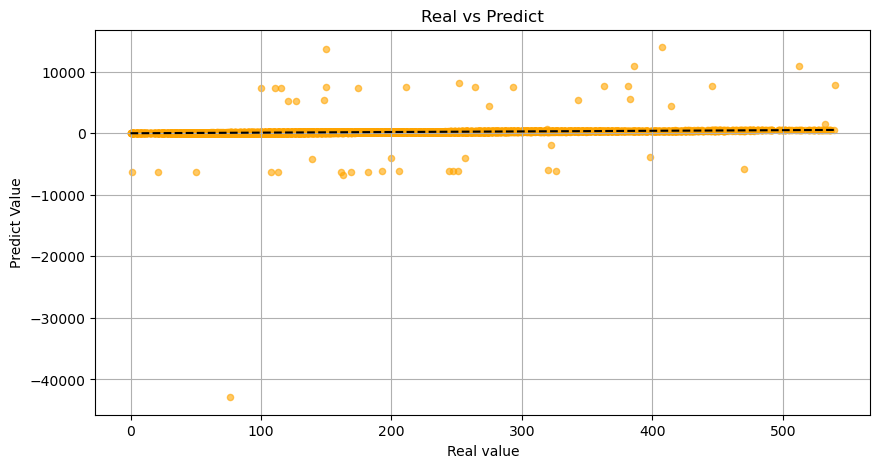

In [76]:
print(y_predict_lin)

# Through Vissualisation
plt.figure(figsize=(10,5))
plt.scatter(x=y_test,y=y_predict_lin,color='orange',alpha=0.6,s=20)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],color = 'black',linestyle = '--')
plt.grid(True)
plt.title('Real vs Predict')
plt.xlabel('Real value')
plt.ylabel('Predict Value')
plt.show()


In [79]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [81]:
def evaluate_model(y_test, y_pred, model_name):
    print(f"{model_name} Performance:")
    print("MAE:", mean_absolute_error(y_test, y_pred))
    print("MSE:", mean_squared_error(y_test, y_pred))
    print("R2 Score:", r2_score(y_test, y_pred))
    print("\n")

In [83]:
evaluate_model(y_test, y_predict_lin, 'LinearRegression')

LinearRegression Performance:
MAE: 76.1660618609819
MSE: 669084.9046316708
R2 Score: -47.94982832253636




Decision Tree Regressor

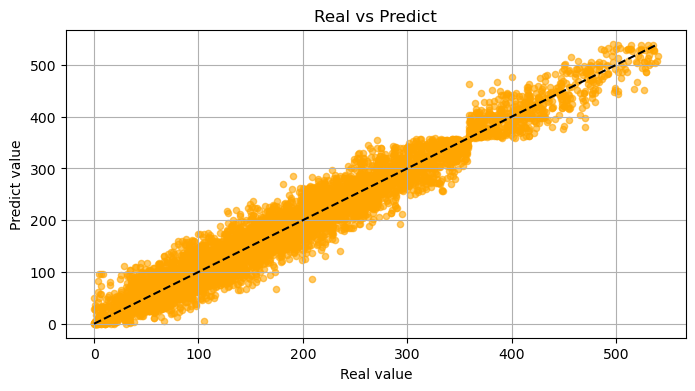

In [85]:
DTR = DecisionTreeRegressor(random_state=42)
DTR.fit(X_train,y_train)
y_predict_dtr = DTR.predict(X_test)
# Explain through visualization
plt.figure(figsize=(8,4))
plt.scatter( x=y_test,y=y_predict_dtr,color ='orange',alpha=0.6,s=20)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black', linestyle='--')
plt.grid(True)
plt.title('Real vs Predict')
plt.xlabel('Real value')
plt.ylabel('Predict value')
plt.show()

In [87]:
def evaluate_model(y_test, y_pred, model_name):
    print(f"{model_name} Performance:")
    print("MAE:", mean_absolute_error(y_test, y_pred))
    print("MSE:", mean_squared_error(y_test, y_pred))
    print("R2 Score:", r2_score(y_test, y_pred))
    print("\n")

In [89]:
evaluate_model(y_test, y_predict_dtr, 'DecisionTreeRegressor')

DecisionTreeRegressor Performance:
MAE: 21.124487452845663
MSE: 721.1595866819747
R2 Score: 0.947240420884003




Random Forest Regressor

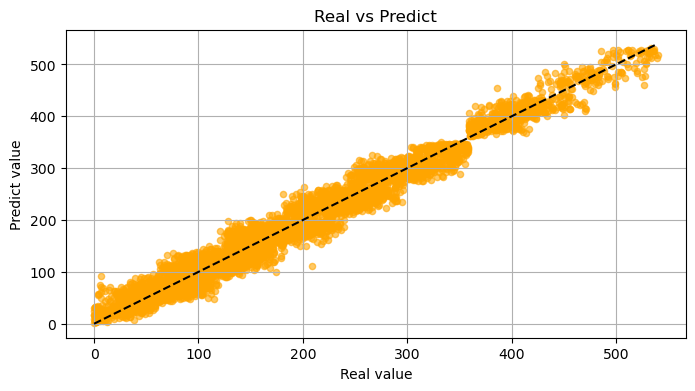

In [91]:
RFR = RandomForestRegressor(n_estimators=100,random_state=42)
RFR.fit(X_train,y_train)
y_predict_rfr = RFR.predict(X_test)
# Explain through visualization
plt.figure(figsize=(8,4))
plt.scatter( x=y_test,y=y_predict_rfr,color ='orange',alpha=0.6,s=20)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black', linestyle='--')
plt.grid(True)
plt.title('Real vs Predict')
plt.xlabel('Real value')
plt.ylabel('Predict value')
plt.show()

In [93]:
def evaluate_model(y_test, y_pred, model_name):
    print(f"{model_name} Performance:")
    print("MAE:", mean_absolute_error(y_test, y_pred))
    print("MSE:", mean_squared_error(y_test, y_pred))
    print("R2 Score:", r2_score(y_test, y_pred))
    print("\n")

evaluate_model(y_test, y_predict_rfr, 'RandomForestRegressor')

RandomForestRegressor Performance:
MAE: 15.960551090700346
MSE: 402.47986927997374
R2 Score: 0.9705548273946233




SVR

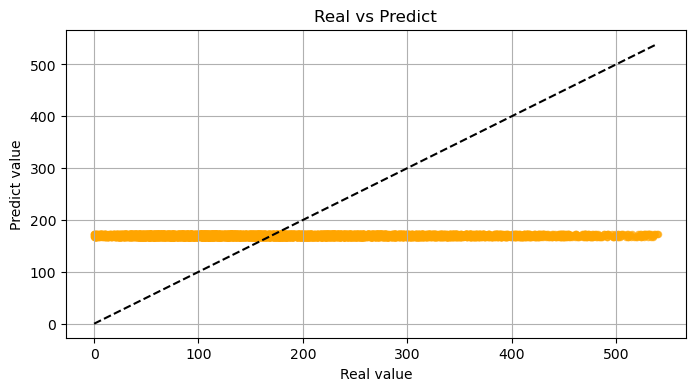

In [95]:
from sklearn.svm import SVR
svr = SVR(kernel='rbf',C= 1.0,epsilon=0.2)
svr.fit(X_train,y_train)
y_predict_svr = svr.predict(X_test)
# Explain through visualization
plt.figure(figsize=(8,4))
plt.scatter( x=y_test,y=y_predict_svr,color ='orange',alpha=0.6,s=20)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black', linestyle='--')
plt.grid(True)
plt.title('Real vs Predict')
plt.xlabel('Real value')
plt.ylabel('Predict value')
plt.show()

In [97]:
def evaluate_model(y_test, y_pred, model_name):
    print(f"{model_name} Performance:")
    print("MAE:", mean_absolute_error(y_test, y_pred))
    print("MSE:", mean_squared_error(y_test, y_pred))
    print("R2 Score:", r2_score(y_test, y_pred))
    print("\n")

evaluate_model(y_test, y_predict_svr, 'SVM')

SVM Performance:
MAE: 94.50918676966594
MSE: 14011.243892864057
R2 Score: -0.025053738909920353




Gradient Boosting Regressor

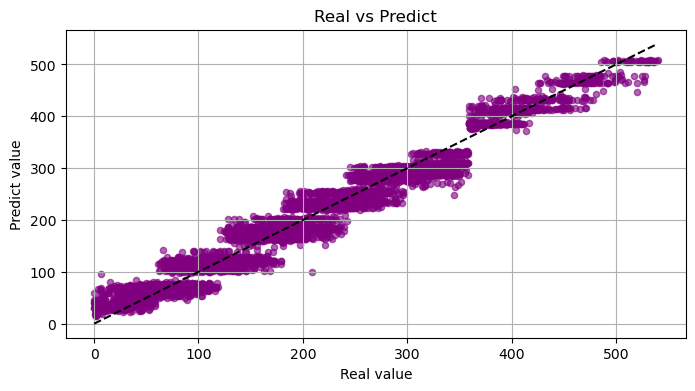

In [99]:

from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor(n_estimators=100,random_state=42)
GBR.fit(X_train,y_train)
y_predict_gbr=GBR.predict(X_test)
# Explain through visualization
plt.figure(figsize=(8,4))
plt.scatter( x=y_test,y=y_predict_gbr,color ='purple',alpha=0.6,s=20)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black', linestyle='--')
plt.grid(True)
plt.title('Real vs Predict')
plt.xlabel('Real value')
plt.ylabel('Predict value')
plt.show()

In [101]:
def evaluate_model(y_test, y_pred, model_name):
    print(f"{model_name} Performance:")
    print("MAE:", mean_absolute_error(y_test, y_pred))
    print("MSE:", mean_squared_error(y_test, y_pred))
    print("R2 Score:", r2_score(y_test, y_pred))
    print("\n")

evaluate_model(y_test, y_predict_gbr, 'GradientBoostingRegressor')

GradientBoostingRegressor Performance:
MAE: 18.797320982759906
MSE: 540.009580892773
R2 Score: 0.9604932407019741




Grouping all models based on the evaluation

In [103]:


results = {
    'Model': ['Linear Regression', 'Random Forest', 'Decision Tree', 'GradientBoostingRegressor', 'SVR'],
    'MAE': [
        mean_absolute_error(y_test, y_predict_lin),
        mean_absolute_error(y_test, y_predict_rfr),
        mean_absolute_error(y_test, y_predict_dtr),
        mean_absolute_error(y_test, y_predict_gbr),
        mean_absolute_error(y_test, y_predict_svr)
    ],
    'MSE': [
        mean_squared_error(y_test, y_predict_lin),
        mean_squared_error(y_test, y_predict_rfr),
        mean_squared_error(y_test, y_predict_dtr),
        mean_squared_error(y_test, y_predict_gbr),
        mean_squared_error(y_test, y_predict_svr)
    ],
    'R2 Score': [
        r2_score(y_test, y_predict_lin),
        r2_score(y_test, y_predict_rfr),
        r2_score(y_test, y_predict_dtr),
        r2_score(y_test, y_predict_gbr),
        r2_score(y_test, y_predict_svr)
    ]
}

df_results = pd.DataFrame(results)
print(df_results)


                       Model        MAE            MSE   R2 Score
0          Linear Regression  76.166062  669084.904632 -47.949828
1              Random Forest  15.960551     402.479869   0.970555
2              Decision Tree  21.124487     721.159587   0.947240
3  GradientBoostingRegressor  18.797321     540.009581   0.960493
4                        SVR  94.509187   14011.243893  -0.025054


Findings:- we can see that variations in different models. in that R2 sqaure showned that Linear Regression models and Svr 
models the predications were given negative results. Meanwhile, Random Forest, Decision Tree, Gradient Booster Regressor were
given clear and possitive results and also its around 95% and above . so, these models are more accurate than other.